In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn.metrics')

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [4]:
housing=pd.read_csv("house_data.csv")

In [5]:
housing.head()

Size (sq ft)  Bedrooms    Location   Price
0          3974         3  Faisalabad   48002
1          1660         6      Multan  195536
2          2094         3  Faisalabad   53479
3          1930         1  Faisalabad   43913
4          1895         6      Lahore  157450

<b>Data Inspection</b>

In [6]:
housing.shape

(200, 4)

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Size (sq ft)  200 non-null    int64 
 1   Bedrooms      200 non-null    int64 
 2   Location      200 non-null    object
 3   Price         200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [8]:
housing.describe()

Size (sq ft)    Bedrooms          Price
count    200.000000  200.000000     200.000000
mean    2509.580000    3.385000  125432.985000
std      898.436875    1.752751   58214.507182
min      821.000000    1.000000   40412.000000
25%     1810.750000    2.000000   82743.000000
50%     2481.500000    3.000000  109128.500000
75%     3356.500000    5.000000  191734.000000
max     3974.000000    6.000000  209968.000000

**Data Cleaning**

In [9]:
# Checking Null values
housing.isnull().sum()
# There are no NULL values in the dataset, hence it is clean.

Size (sq ft)    0
Bedrooms        0
Location        0
Price           0
dtype: int64

**Feature Engineering**

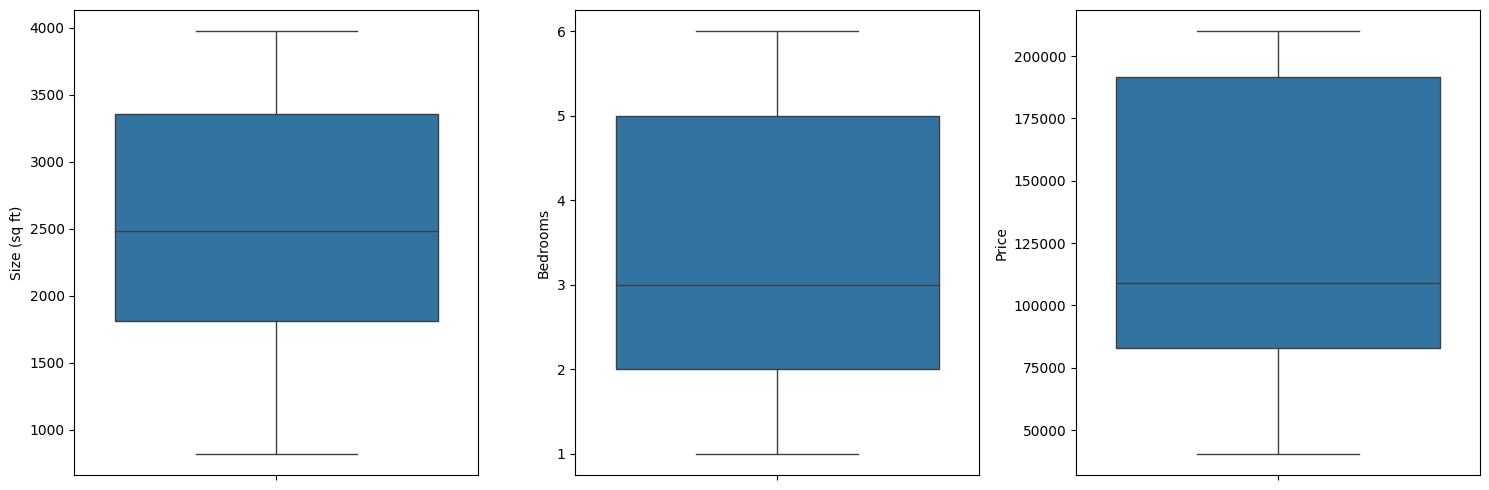

In [10]:
#Outlier Analysis
fig, axs = plt.subplots(1,3, figsize = (15,5))
plt1 = sns.boxplot(housing['Size (sq ft)'], ax = axs[0])
plt2 = sns.boxplot(housing['Bedrooms'], ax = axs[1])
plt3 = sns.boxplot(housing['Price'], ax = axs[2])
plt.tight_layout()

**Exploratory Data Analytics**

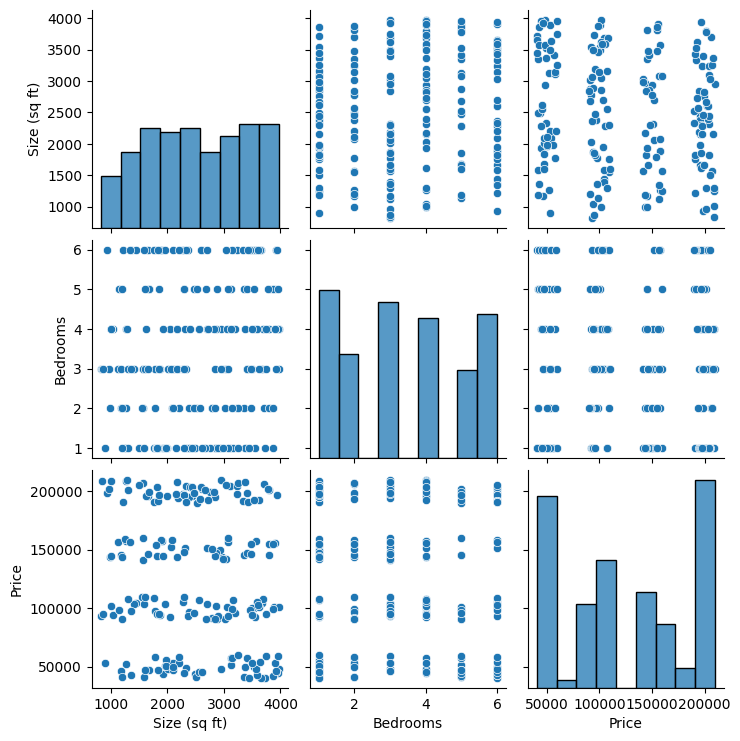

In [11]:
sns.pairplot(housing)

<Axes: xlabel='Location', ylabel='Price'>

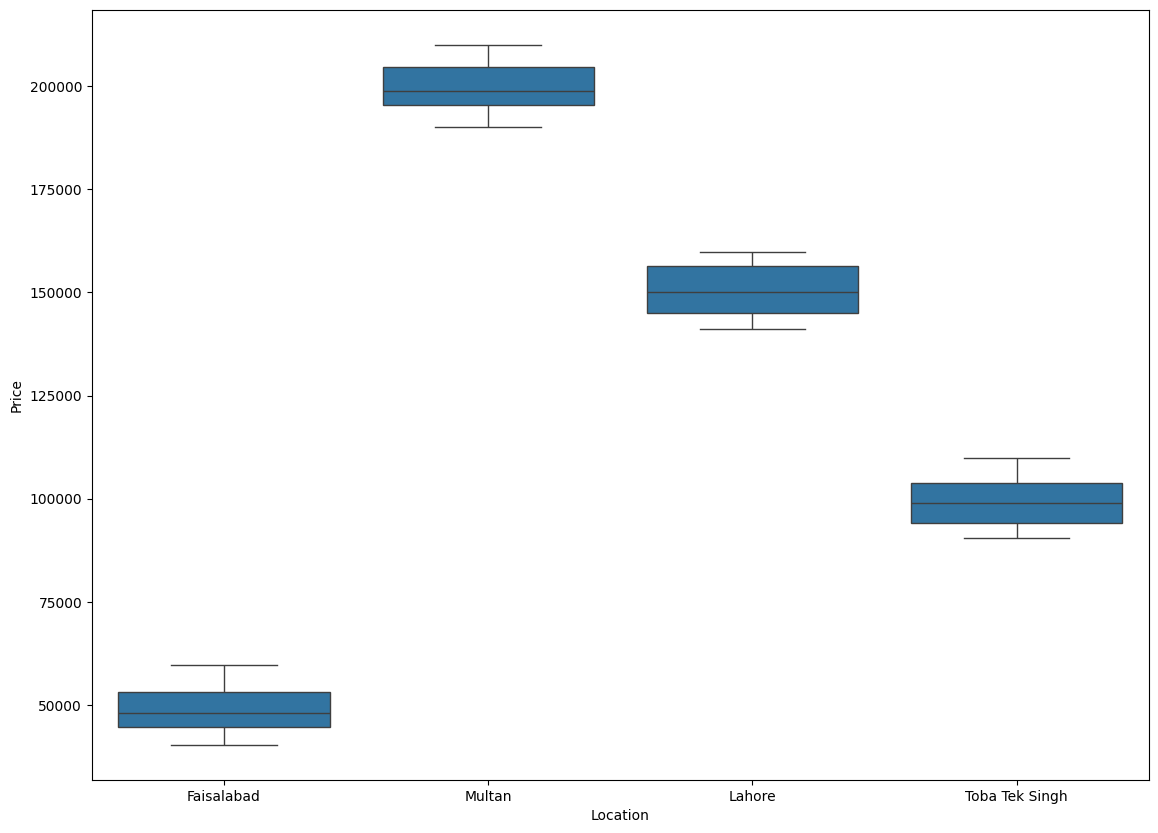

In [12]:
plt.figure(figsize=(30, 10))
plt.subplot(1,2,1)
sns.boxplot(x = 'Location', y = 'Price', data = housing)

**Data Preparation**

* You can see that our dataset has one column (Location) with a string.
* But to fit a regression line, we would need numerical values, not strings. Hence, we need to convert the string into numerical.

In [13]:
housing['Location'].unique()

array(['Faisalabad', 'Multan', 'Lahore', 'Toba Tek Singh'], dtype=object)

In [14]:
status = pd.get_dummies(housing['Location'],drop_first=True)

In [15]:
status.head()

Lahore  Multan  Toba Tek Singh
0   False   False           False
1   False    True           False
2   False   False           False
3   False   False           False
4    True   False           False

In [16]:
pd.set_option('future.no_silent_downcasting', True)
status=status.replace({True:1,False:0})

In [17]:
status.head()

Lahore Multan Toba Tek Singh
0      0      0              0
1      0      1              0
2      0      0              0
3      0      0              0
4      1      0              0

In [18]:
housing = pd.concat([housing, status], axis = 1)

In [19]:
housing.head()

Size (sq ft)  Bedrooms    Location   Price Lahore Multan Toba Tek Singh
0          3974         3  Faisalabad   48002      0      0              0
1          1660         6      Multan  195536      0      1              0
2          2094         3  Faisalabad   53479      0      0              0
3          1930         1  Faisalabad   43913      0      0              0
4          1895         6      Lahore  157450      1      0              0

In [20]:
housing.drop(['Location'], axis = 1, inplace = True)

In [21]:
housing.head()

Size (sq ft)  Bedrooms   Price Lahore Multan Toba Tek Singh
0          3974         3   48002      0      0              0
1          1660         6  195536      0      1              0
2          2094         3   53479      0      0              0
3          1930         1   43913      0      0              0
4          1895         6  157450      1      0              0

In [22]:
x=housing.drop("Price",axis=1)
y=housing["Price"]

**Splitting the Data into Training and Testing Sets**

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

**Model selection and training (linear regression)**

In [24]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [25]:
reg.fit(x_train,y_train)

LinearRegression()

**Model evaluation and fine-tuning**

In [26]:
reg.predict(x_test)

array([ 48316.56528376,  98617.19155244,  48303.20880275,  48129.00809088,
       199401.83298367, 150196.34176031,  47984.49048199, 150551.41469405,
        98482.10667219,  48135.75821566, 150082.85286405, 149975.36940347,
       150542.07781111,  98014.78599069,  98660.68828844, 199361.97246295,
       199446.91494358, 199337.55010655,  98367.12839773, 199355.27026102,
        48218.57109013, 199609.55332065, 199282.09042204, 199146.06054583,
        48367.50029534, 199243.21420466,  98195.60167426, 199010.87120442,
        97936.84186454,  48254.56439679,  98615.40602168, 150493.02417598,
       150100.52509568,  98358.08766733,  98824.27166148, 199663.3233201 ,
       149869.91970335, 149807.95812377,  48340.20364368,  48451.85047087])

In [27]:
reg.score(x_test,y_test)

0.9885951552273895

In [28]:
y_predicted=reg.predict(x_test)

In [29]:
data={
    'LinearRegression':{
        'model':LinearRegression(),
        'params':{'positive':[True,False],
                 'fit_intercept':[True,False],
                  'copy_X':[True,False],}}
}   

In [30]:
from sklearn.model_selection import GridSearchCV
result=[]
for name,value in data.items():
    cv=GridSearchCV(value["model"],value["params"],return_train_score=False)
    cv.fit(x,y)
    result.append({
        'model_name':name,
        'best_params':cv.best_params_,
        'best_score':cv.best_score_
         }
    )

In [31]:
result

[{'model_name': 'LinearRegression',
  'best_params': {'copy_X': True, 'fit_intercept': True, 'positive': True},
  'best_score': 0.9892101258531916}]